In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv('train (1).csv')
test = pd.read_csv('test (1).csv')

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
print("Before removing duplicates:", train.shape)
train.drop_duplicates(inplace=True)
print("After removing duplicates:", train.shape)

Before removing duplicates: (1460, 81)
After removing duplicates: (1460, 81)


In [8]:
threshold = 0.5
missing_frac = train.isnull().mean()
cols_to_drop = missing_frac[missing_frac > threshold].index.tolist()
print("Columns with >50% missing:")
for col in cols_to_drop:
    print(f"{col}: {missing_frac[col]:.2%} missing")

Columns with >50% missing:
Alley: 93.77% missing
MasVnrType: 59.73% missing
PoolQC: 99.52% missing
Fence: 80.75% missing
MiscFeature: 96.30% missing


In [9]:
threshold = 0.5 * len(train)
missing_pct = train.isnull().sum() / len(train)
cols_to_drop = missing_pct[missing_pct > 0.5].index.tolist()
print("Columns to drop (>50% missing):", cols_to_drop)

Columns to drop (>50% missing): ['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature']


In [10]:
train.drop(columns=cols_to_drop, inplace=True)
test.drop(columns=[col for col in cols_to_drop if col in test.columns], inplace=True)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [12]:
print("Train shape after dropping columns:", train.shape)
print("Test shape after dropping columns:", test.shape)

Train shape after dropping columns: (1460, 76)
Test shape after dropping columns: (1459, 75)


In [13]:
numeric_cols = train.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = train.select_dtypes(exclude=[np.number]).columns.tolist()

if 'SalePrice' in numeric_cols:
    numeric_cols.remove('SalePrice')

print("Numeric features:", len(numeric_cols))
print("Categorical features:", len(categorical_cols))

Numeric features: 37
Categorical features: 38


In [14]:
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

train[numeric_cols] = num_imputer.fit_transform(train[numeric_cols])
test[numeric_cols] = num_imputer.transform(test[numeric_cols])

train[categorical_cols] = cat_imputer.fit_transform(train[categorical_cols])
test[categorical_cols] = cat_imputer.transform(test[categorical_cols])

In [15]:
print("Missing in train after imputation:", train.isnull().sum().sum())
print("Missing in test after imputation:", test.isnull().sum().sum())

Missing in train after imputation: 0
Missing in test after imputation: 0


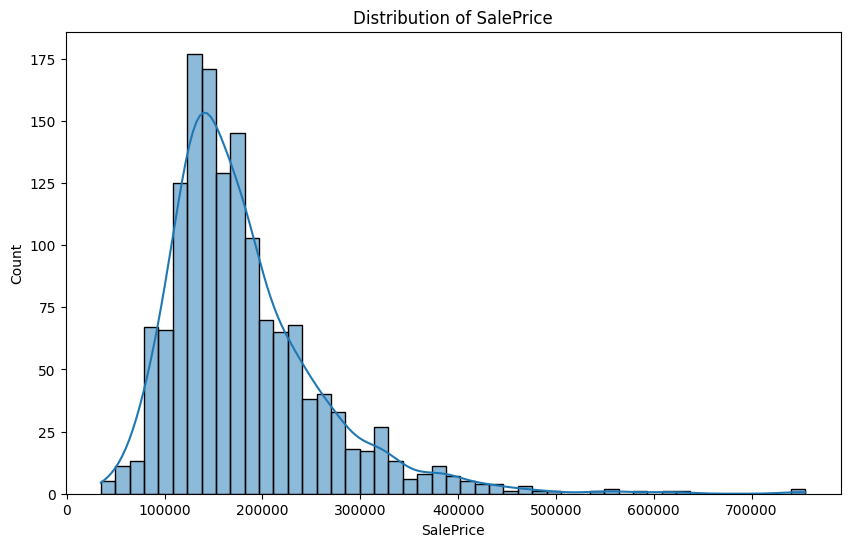

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(train['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.show()

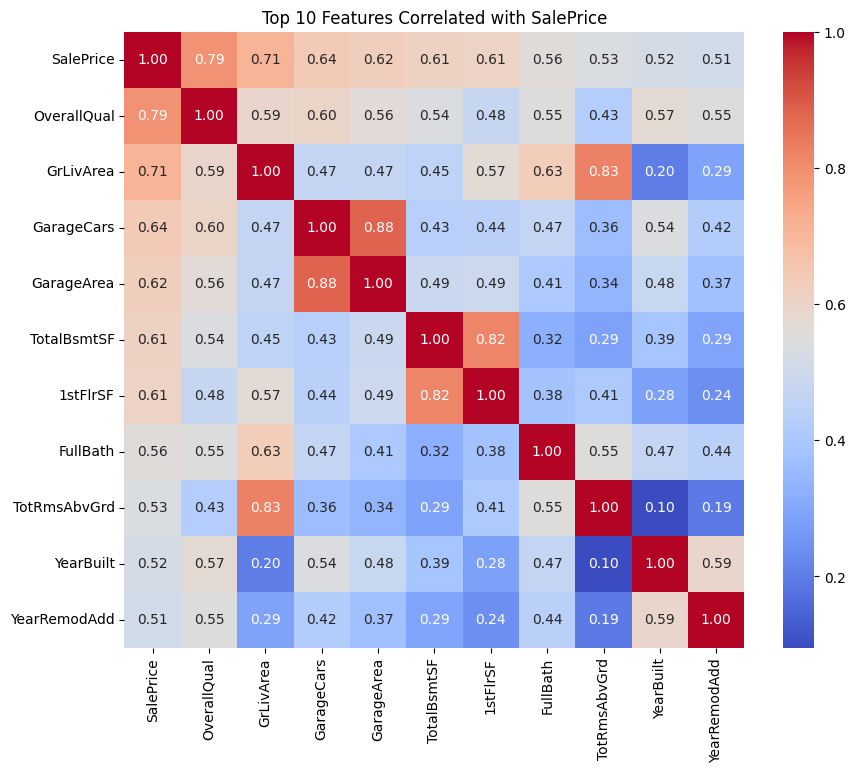

In [17]:
corr = train[numeric_cols + ['SalePrice']].corr()
top_features = corr['SalePrice'].abs().sort_values(ascending=False).head(11).index
plt.figure(figsize=(10, 8))
sns.heatmap(train[top_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Top 10 Features Correlated with SalePrice')
plt.show()

In [18]:
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col].astype(str))
    test[col] = le.transform(test[col].astype(str))
    label_encoders[col] = le

In [19]:
print("Final train shape:", train.shape)
print("Final test shape:", test.shape)
print("Columns in train but not in test:", set(train.columns) - set(test.columns))

Final train shape: (1460, 76)
Final test shape: (1459, 75)
Columns in train but not in test: {'SalePrice'}


In [20]:
X = train.drop(columns=['SalePrice', 'Id'])
y = train['SalePrice']
X_test = test[X.columns]

In [21]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)

X_train shape: (1168, 74)
X_val shape: (292, 74)


In [24]:
# Prepare features and target
X = train.drop(columns=['SalePrice', 'Id'])
y = train['SalePrice']
X_test_final = test[X.columns]  # align test with train features

# Now define numeric and categorical columns FROM X (safe!)
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()

print("Numeric features:", len(numeric_cols))
print("Categorical features:", len(categorical_cols))

Numeric features: 74
Categorical features: 0


In [25]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_cols])
X_val_scaled = scaler.transform(X_val[numeric_cols])
X_test_scaled = scaler.transform(X_test_final[numeric_cols])

X_train_non_tree = np.hstack([X_train_scaled, X_train[categorical_cols].values])
X_val_non_tree = np.hstack([X_val_scaled, X_val[categorical_cols].values])
X_test_non_tree = np.hstack([X_test_scaled, X_test_final[categorical_cols].values])

In [27]:
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(alpha=10),
    'Lasso': Lasso(alpha=0.1),
    'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5),
    'KNN': KNeighborsRegressor(n_neighbors=5),
    'SVR': SVR(C=100, gamma=0.001),
    'DecisionTree': DecisionTreeRegressor(random_state=42),
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42, eval_metric='rmse'),
    'LightGBM': LGBMRegressor(n_estimators=100, random_state=42),
    'CatBoost': CatBoostRegressor(n_estimators=100, verbose=0, random_state=42)
}

results = {}
for name, model in models.items():
    if name in ['LinearRegression', 'Ridge', 'Lasso', 'ElasticNet', 'KNN', 'SVR']:
        model.fit(X_train_non_tree, y_train)
        y_pred = model.predict(X_val_non_tree)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
    
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    r2 = r2_score(y_val, y_pred)
    results[name] = {'RMSE': rmse, 'R2': r2}

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000980 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3100
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 69
[LightGBM] [Info] Start training from score 181441.541952


In [28]:
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values('RMSE')
results_df

,RMSE,R2
XGBoost,25981.240001,0.911995
CatBoost,27636.728017,0.900423
RandomForest,28035.860308,0.897526
LightGBM,28822.881035,0.891692
GradientBoosting,28933.410955,0.890860
ElasticNet,34126.549065,0.848165
Ridge,34241.613031,0.847140
Lasso,34281.584293,0.846783
LinearRegression,34281.668954,0.846782
KNN,41473.475503,0.775753


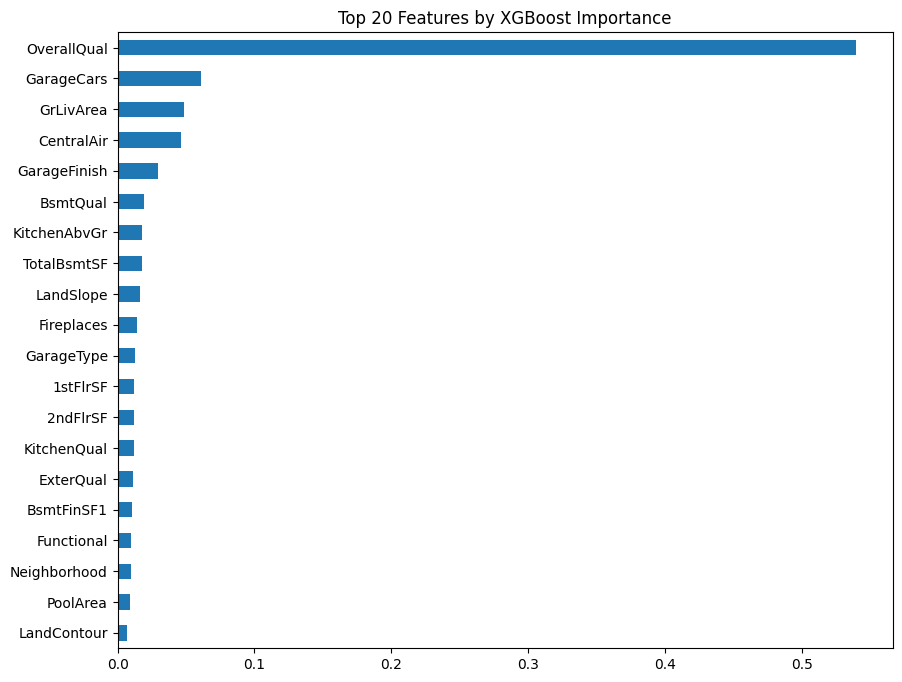

In [29]:
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

importances = xgb_model.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 8))
feat_imp.head(20).plot(kind='barh')
plt.gca().invert_yaxis()
plt.title('Top 20 Features by XGBoost Importance')
plt.show()

In [30]:
best_model_name = results_df.index[0]
print("Best model:", best_model_name)

if best_model_name in ['LinearRegression', 'Ridge', 'Lasso', 'ElasticNet', 'KNN', 'SVR']:
    best_model = models[best_model_name]
    test_preds = best_model.predict(X_test_non_tree)
else:
    best_model = models[best_model_name]
    test_preds = best_model.predict(X_test)

submission = pd.DataFrame({
    'Id': test['Id'],
    'SalePrice': test_preds
})
submission.to_csv('submission.csv', index=False)
print("Submission file saved.")

Best model: XGBoost
Submission file saved.
